In [112]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
from lane import LaneEval
%matplotlib inline

In [113]:
data_root = "/home/ubuntu/mydata/tusimple/train_set/"
date = "0313"

In [27]:
json_gt = [json.loads(line) for line in open(data_root + "label_data_" + date + ".json")]

In [28]:
gt = json_gt[0]
gt_lanes = gt['lanes']
y_samples = gt['h_samples']
raw_file = gt['raw_file']

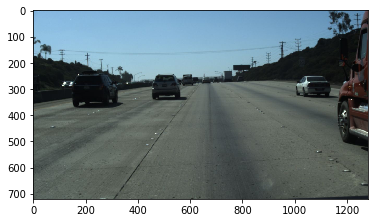

In [29]:
img = plt.imread(data_root+raw_file)
plt.imshow(img)
plt.show()

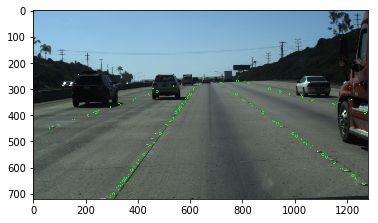

In [30]:
gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
img_vis = img.copy()

for lane in gt_lanes_vis:
    for pt in lane:
        cv2.circle(img_vis, pt, radius=5, color=(0, 255, 0))

plt.imshow(img_vis)
plt.show()

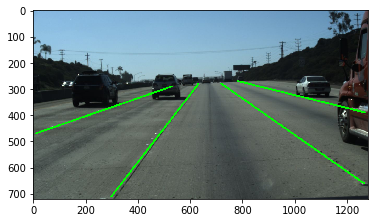

In [32]:
gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, y_samples) if x >= 0] for lane in gt_lanes]
img_vis = img.copy()

for lane in gt_lanes_vis:
    cv2.polylines(img_vis, np.int32([lane]), isClosed=False, color=(0,255,0), thickness=5)

plt.imshow(img_vis)
plt.show()

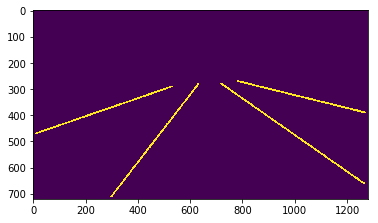

In [111]:
# create *binary* image

img_binary = np.zeros_like(img_vis)
img_binary = cv2.cvtColor(img_binary, cv2.COLOR_BGR2GRAY)

for lane in gt_lanes_vis:
    cv2.polylines(img_binary, np.int32([lane]), isClosed=False, color=255, thickness=5)  # threadhold

plt.imshow(img_binary)
plt.show()

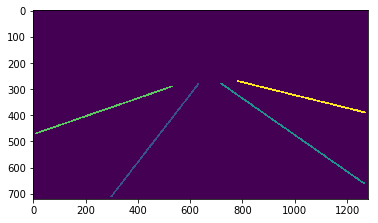

In [110]:
# create instance image

img_instance = img_binary.copy()

num_lines = len(gt_lanes_vis)
for i, lane in enumerate(gt_lanes_vis):
    cv2.polylines(img_instance, np.int32([lane]), isClosed=False, color=(i+1)*255/num_lines, thickness=5)

plt.imshow(img_instance)
plt.show()